In [1]:
# Dependencies
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [2]:
# Read the data
data = pd.read_csv("data/Master.csv",encoding="ISO-8859-1",converters={'zipcode': lambda x: str(x)})
data

,zipcode,State,City,CountyName,Average RE Prices,Income per capita,Median Age Male,Median Age Female,Bachelor's degree > 25,Public transportation
0,00602,AL,Auburn,Lee County,114105.2500,9277.0,41.9,42.8,0.134690,0.002796
1,00606,MO,Neosho,Newton County,59377.7500,5943.0,43.2,43.4,0.068866,0.000000
2,00610,KY,Anasco,Pike County,108219.5833,10220.0,40.4,44.2,0.130349,0.002741
3,00617,AL,Imbery,Coffee County,101022.0000,9122.0,39.2,41.0,0.157224,0.005154
4,00693,PA,Greensburg,Westmoreland County,330761.5000,10536.0,39.2,41.9,0.148064,0.006750
...,...,...,...,...,...,...,...,...,...,...
29733,99827,AK,Haines,Haines Borough,211487.0000,33387.0,45.2,45.8,0.229525,0.002308
29734,99833,AK,Petersburg,Petersburg Borough,254642.9167,33227.0,39.3,42.7,0.219672,0.009211
29735,99835,AK,Sitka,Sitka Borough,402391.3333,38423.0,37.2,40.5,0.204494,0.010178
29736,99901,AK,Ketchikan,Ketchikan Gateway Borough,294448.8333,34886.0,39.4,39.9,0.170142,0.035648


In [3]:
data.drop(columns=['State','City','CountyName'],inplace = True)
data.set_index('zipcode',inplace=True)
data

,Average RE Prices,Income per capita,Median Age Male,Median Age Female,Bachelor's degree > 25,Public transportation
zipcode,,,,,,
00602,114105.2500,9277.0,41.9,42.8,0.134690,0.002796
00606,59377.7500,5943.0,43.2,43.4,0.068866,0.000000
00610,108219.5833,10220.0,40.4,44.2,0.130349,0.002741
00617,101022.0000,9122.0,39.2,41.0,0.157224,0.005154
00693,330761.5000,10536.0,39.2,41.9,0.148064,0.006750
...,...,...,...,...,...,...
99827,211487.0000,33387.0,45.2,45.8,0.229525,0.002308
99833,254642.9167,33227.0,39.3,42.7,0.219672,0.009211
99835,402391.3333,38423.0,37.2,40.5,0.204494,0.010178


In [4]:
# Assess data types
data.dtypes

Average RE Prices         float64
Income per capita         float64
Median Age Male           float64
Median Age Female         float64
Bachelor's degree > 25    float64
Public transportation     float64
dtype: object

In [5]:
# Find any Nan
data.isnull().values.any()

True

In [6]:
data.dropna( inplace=True)

In [7]:
data.isnull().values.any()

False

Text(0.5, 0, 'Attributes')

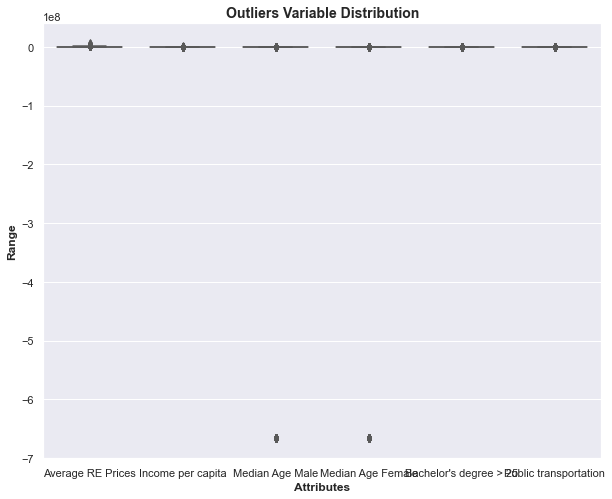

In [8]:
# Outlier Analysis 
attributes = ['Average RE Prices','Income per capita','Median Age Male','Median Age Female',"Bachelor's degree > 25",'Public transportation']
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data = data[attributes], orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold')

In [9]:
#Remove outliers
Q1 = data['Median Age Male'].quantile(0.05)
Q3 = data['Median Age Male'].quantile(0.95)
IQR = Q3 - Q1
data = data[(data['Median Age Male'] >= Q1 - 1.5*IQR) & (data['Median Age Male'] <= Q3 + 1.5*IQR)]

Q1 = data['Median Age Female'].quantile(0.05)
Q3 = data['Median Age Female'].quantile(0.95)
IQR = Q3 - Q1
data = data[(data['Median Age Female'] >= Q1 - 1.5*IQR) & (data['Median Age Female'] <= Q3 + 1.5*IQR)]

In [10]:
# Scale features
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
mms.fit(data)
data_transformed = mms.transform(data)

In [11]:
# Initialize k-means
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)

In [12]:
from sklearn.metrics import silhouette_score
# Silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(data_transformed)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(data_transformed, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.27067223331924145
For n_clusters=3, the silhouette score is 0.3022827801969843
For n_clusters=4, the silhouette score is 0.2545468650305984
For n_clusters=5, the silhouette score is 0.2725872581190862
For n_clusters=6, the silhouette score is 0.2570046071159548
For n_clusters=7, the silhouette score is 0.2221354822598315
For n_clusters=8, the silhouette score is 0.2258192491449257


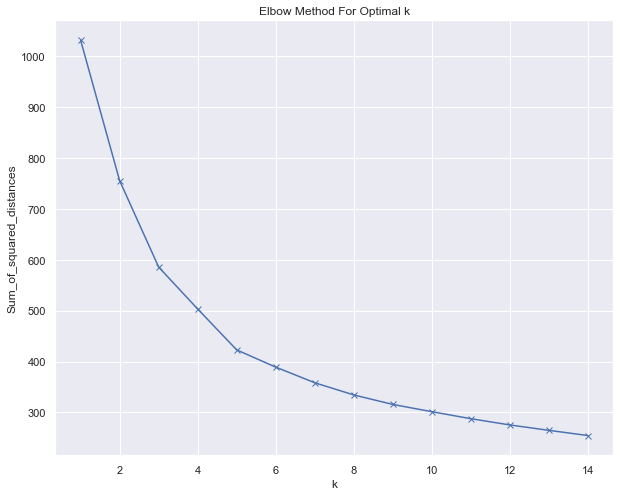

In [13]:
# Determine optimal clusters
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [14]:
# We chose 3 clusters
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)

In [15]:
# Perform prediction
data_predict = data['clusters'] = kmeans.fit_predict(data)

In [16]:
data_predict

array([0, 0, 0, ..., 2, 0, 0], dtype=int32)

In [17]:
# View cluster predictions
data

,Average RE Prices,Income per capita,Median Age Male,Median Age Female,Bachelor's degree > 25,Public transportation,clusters
zipcode,,,,,,,
00602,114105.2500,9277.0,41.9,42.8,0.134690,0.002796,0
00606,59377.7500,5943.0,43.2,43.4,0.068866,0.000000,0
00610,108219.5833,10220.0,40.4,44.2,0.130349,0.002741,0
00617,101022.0000,9122.0,39.2,41.0,0.157224,0.005154,0
00693,330761.5000,10536.0,39.2,41.9,0.148064,0.006750,2
...,...,...,...,...,...,...,...
99827,211487.0000,33387.0,45.2,45.8,0.229525,0.002308,0
99833,254642.9167,33227.0,39.3,42.7,0.219672,0.009211,0
99835,402391.3333,38423.0,37.2,40.5,0.204494,0.010178,2


<AxesSubplot:xlabel='clusters', ylabel='Average RE Prices'>

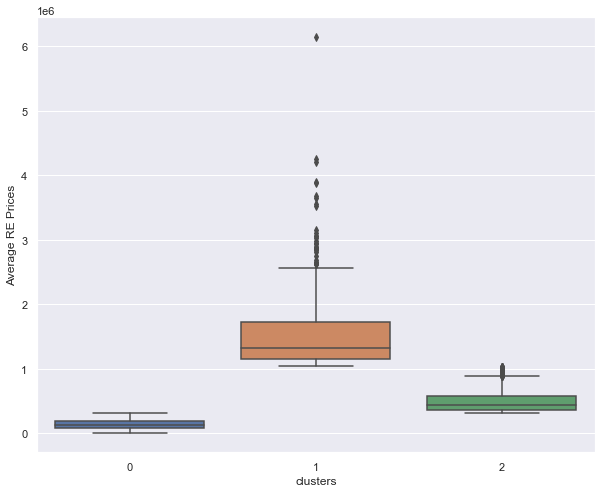

In [18]:
sns.boxplot(x="clusters", y="Average RE Prices", data=data)

<AxesSubplot:xlabel='clusters', ylabel='Income per capita'>

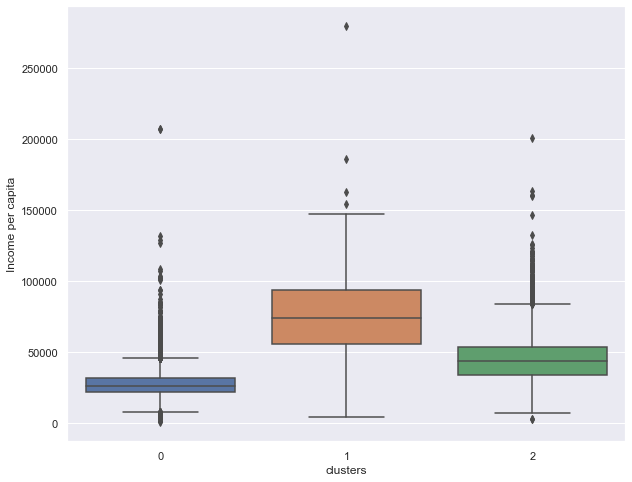

In [19]:
sns.boxplot(x="clusters", y="Income per capita", data=data)

<AxesSubplot:xlabel='clusters', ylabel='Median Age Male'>

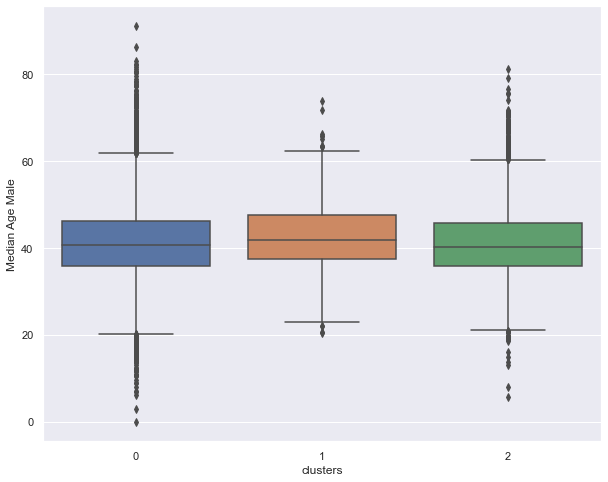

In [20]:
sns.boxplot(x="clusters", y="Median Age Male", data=data)

<AxesSubplot:xlabel='clusters', ylabel='Median Age Female'>

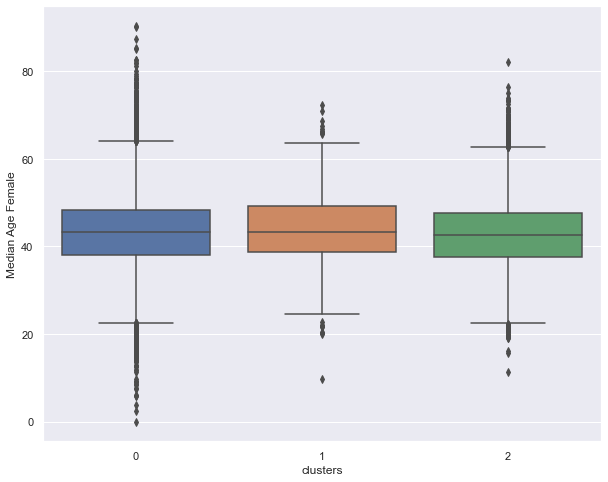

In [21]:
sns.boxplot(x="clusters", y="Median Age Female", data=data)

<AxesSubplot:xlabel='clusters', ylabel="Bachelor's degree > 25">

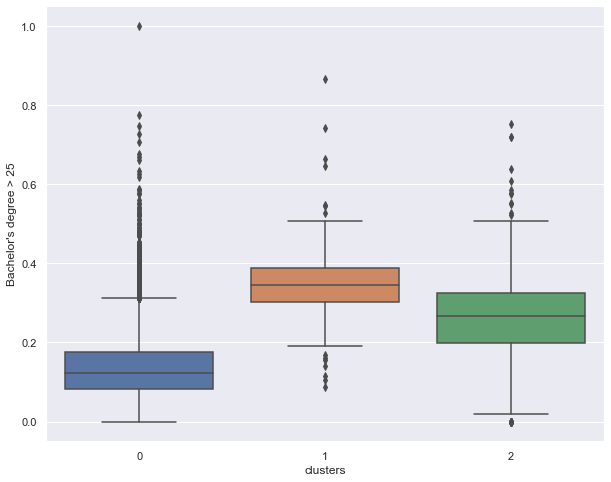

In [22]:
sns.boxplot(x="clusters", y="Bachelor's degree > 25", data=data)

<AxesSubplot:xlabel='clusters', ylabel='Public transportation'>

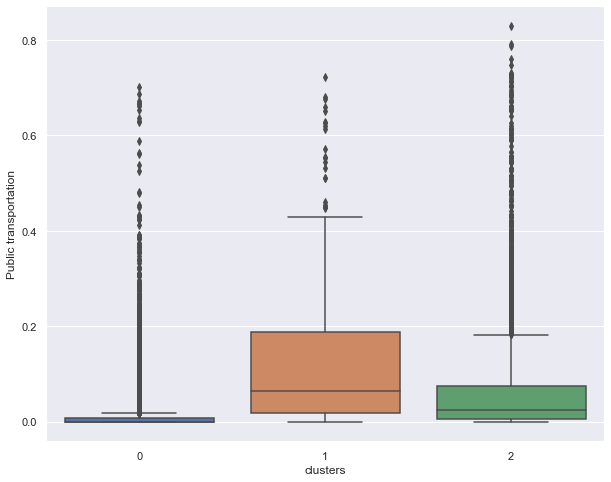

In [23]:
sns.boxplot(x="clusters", y="Public transportation", data=data)

In [24]:
# Export to csv for manual assessment
data.to_csv('data/cluster_predict.csv')